In [41]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [42]:
#matplotlib 한글 깨짐 해결 코드 
import os


# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정

if os.name == 'posix':

    plt.rc('font', family="AppleGothic")

else:

    plt.rc("font", family="Malgun Gothic")

In [43]:
df = pd.read_csv("C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube_0717.csv",lineterminator='\n')
df_unique = pd.read_csv("C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube_nodouble_unique.csv",lineterminator='\n')

In [44]:
# 데이터 타입부터 변환 및 전처리
df['category_name'] = df['category_name'].astype('category') #category_name도 타입 바꾸자
df['channelId'] = df['channelId'].astype('category') #channelld도 타입 바꾸자
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137541 entries, 0 to 137540
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   video_id           137541 non-null  object  
 1   title              137541 non-null  object  
 2   publishedAt        137541 non-null  object  
 3   channelId          137541 non-null  category
 4   channelTitle       137541 non-null  object  
 5   trending_date      137541 non-null  object  
 6   tags               137541 non-null  object  
 7   view_count         137541 non-null  int64   
 8   likes              137541 non-null  int64   
 9   dislikes           137541 non-null  int64   
 10  comment_count      137541 non-null  int64   
 11  comments_disabled  137541 non-null  bool    
 12  ratings_disabled   137541 non-null  bool    
 13  description        133998 non-null  object  
 14  category_name      137541 non-null  category
 15  tag_num            137541 non-null

In [45]:
#df_unique 타입 변환
df_unique['category_name'] = df_unique['category_name'].astype('category') #category_name도 타입 바꾸자
df_unique['channelId'] = df_unique['channelId'].astype('category') #channelld도 타입 바꾸자
df_unique.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   video_id           16928 non-null  object  
 1   title              16928 non-null  object  
 2   publishedAt        16928 non-null  object  
 3   channelId          16928 non-null  category
 4   channelTitle       16928 non-null  object  
 5   trending_date      16928 non-null  object  
 6   tags               16928 non-null  object  
 7   view_count         16928 non-null  int64   
 8   likes              16928 non-null  int64   
 9   dislikes           16928 non-null  int64   
 10  comment_count      16928 non-null  int64   
 11  description        16479 non-null  object  
 12  category_name      16928 non-null  category
 13  tag_num            16928 non-null  int64   
 14  period             16928 non-null  int64   
 15  Unnamed: 0         16928 non-null  float64 
 16  comm

In [46]:
pd.options.display.float_format = '{:.2f}'.format

In [47]:
df_unique['category_name'].value_counts(normalize=True) 

Entertainment           0.34
People & Blogs          0.15
Music                   0.11
Sports                  0.08
News & Politics         0.07
Comedy                  0.06
Howto & Style           0.04
Gaming                  0.04
Film & Animation        0.03
Education               0.02
Pets & Animals          0.02
Science & Technology    0.02
Travel & Events         0.01
Autos & Vehicles        0.01
Nonprofits & Activism   0.00
Name: category_name, dtype: float64

In [48]:
#10일 이상 인기 동영상으로 선정된 영상들 분석 df_unique_long
df_unique_long = df_unique[df_unique['period'] >=10]

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
long_count = df_unique_long['category_name'].value_counts(normalize=True) 
long_count#10일 이상 인기를 유지한 동영상들은 어떤 카테고리들이었나?
#엔터테인먼트 1843개로 압도적인 1위(35.03%) 근데 의외로 음악(551개)보다 People & Blogs(882개)의 갯수가 더 많네요? 
#People & Blogs로 분류된 동영상들이 어떤 영상들이었는지 파악해볼 필요가 있을 것 같아요!
#정치 뉴스도 의외로 중간에 위치. 뉴스는 하루가 지나면 잘 안 보기 마련인데 이것도 분석해볼 수 있으면 좋을 듯

#또 하나 더 있었는데 뭐였지 아... 조회수 변화 추이 살펴보기(이거는 df 이용)
#인기 동영상의 태그 수, 좋아요 수, 댓글 수, 등등 상관관계 찾아보기(로그 변환이나 그런 거 하면 좋을 것 같은데 아니면 trending date 제일 빠른 거나 느린 거 기준으로)

Entertainment           0.35
People & Blogs          0.17
Music                   0.10
Comedy                  0.08
Sports                  0.06
Howto & Style           0.06
Gaming                  0.04
Film & Animation        0.03
News & Politics         0.03
Travel & Events         0.02
Pets & Animals          0.02
Education               0.02
Science & Technology    0.02
Autos & Vehicles        0.01
Nonprofits & Activism   0.00
Name: category_name, dtype: float64

In [50]:
sizes = [long_count[0],long_count[1], long_count[2],long_count[3], long_count[4],long_count[5],long_count[6], long_count[7]+long_count[8]+long_count[9]+long_count[10]+long_count[11]+long_count[12]+long_count[13]+long_count[14]] # 각 조각의 크기
labels = ['Entertainment', 'People & Blogs', 'Music','Comedy','Sports','Howto & Style','Gaming','etc'] # 각 조각의 이름
colors = ['yellowgreen', 'lightskyblue', 'lightcoral','lightseagreen','khaki','pink','magenta','lightcyan'] # 각 조각의 색깔
explodes = (0.1, 0, 0,0,0,0,0,0) # 첫 번째 조각에 대해서 0.1만큼의 간격 부여. 0은 간격 없음. default = 0.

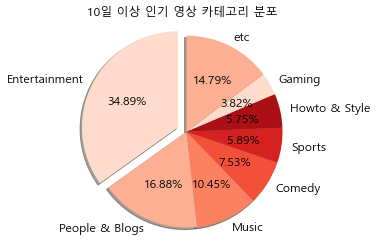

In [51]:
custom_palette = sns.color_palette("Reds")
sns.set_palette(custom_palette)
plt.pie(sizes,
        labels = labels,
        
        explode = explodes, # 각 조각 간의 간격 지정
        autopct = "%1.2f%%", # 우리가 부여한 숫자(sizes)를 알아서 퍼센트로 변환. 그 퍼센트의 소숫점 자릿수를 지정.
        shadow = True,
        startangle = 90, # 시작 각도
        textprops = {'fontsize':12},
       colors = custom_palette) # 글자 크기
plt.axis('equal') # x축과 y축의 길이를 동일하게 해줘
plt.title('10일 이상 인기 영상 카테고리 분포')
plt.show()

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
count = df_unique['category_name'].value_counts(normalize=True) 
count#10일 이상 인기를 유지한 동영상들은 어떤 카테고리들이었나?
#엔터테인먼트 1843개로 압도적인 1위(35.03%) 근데 의외로 음악(551개)보다 People & Blogs(882개)의 갯수가 더 많네요? 
#People & Blogs로 분류된 동영상들이 어떤 영상들이었는지 파악해볼 필요가 있을 것 같아요!
#정치 뉴스도 의외로 중간에 위치. 뉴스는 하루가 지나면 잘 안 보기 마련인데 이것도 분석해볼 수 있으면 좋을 듯

#또 하나 더 있었는데 뭐였지 아... 조회수 변화 추이 살펴보기(이거는 df 이용)
#인기 동영상의 태그 수, 좋아요 수, 댓글 수, 등등 상관관계 찾아보기(로그 변환이나 그런 거 하면 좋을 것 같은데 아니면 trending date 제일 빠른 거나 느린 거 기준으로)

Entertainment           0.34
People & Blogs          0.15
Music                   0.11
Sports                  0.08
News & Politics         0.07
Comedy                  0.06
Howto & Style           0.04
Gaming                  0.04
Film & Animation        0.03
Education               0.02
Pets & Animals          0.02
Science & Technology    0.02
Travel & Events         0.01
Autos & Vehicles        0.01
Nonprofits & Activism   0.00
Name: category_name, dtype: float64

In [53]:
sizes = [count[0],count[1], count[2],count[3],count[4],count[5],count[6],count[7]+count[8]+count[9]+count[10]+count[11]+count[12]+count[13]+count[14]] # 각 조각의 크기
labels = ['Entertainment', 'People & Blogs', 'Music','Comedy','Sports','Howto & Style','Gaming','etc'] # 각 조각의 이름
colors = ['yellowgreen', 'lightskyblue', 'lightcoral','lightseagreen','khaki','pink','magenta','lightcyan'] # 각 조각의 색깔
explodes = (0.1, 0, 0,0,0,0,0,0) # 첫 번째 조각에 대해서 0.1만큼의 간격 부여. 0은 간격 없음. default = 0.

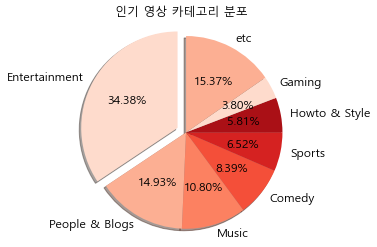

In [54]:
custom_palette = sns.color_palette("Reds")
sns.set_palette(custom_palette)
plt.pie(sizes,
        labels = labels,
        colors = custom_palette,
        explode = explodes, # 각 조각 간의 간격 지정
        autopct = "%1.2f%%", # 우리가 부여한 숫자(sizes)를 알아서 퍼센트로 변환. 그 퍼센트의 소숫점 자릿수를 지정.
        shadow = True,
        startangle = 90, # 시작 각도
        textprops = {'fontsize':12}) # 글자 크기
plt.axis('equal') # x축과 y축의 길이를 동일하게 해줘
plt.title('인기 영상 카테고리 분포')
plt.show()

In [55]:
df_unique_short = df_unique[df_unique['period'] <= 6]

In [56]:
df_unique_short['category_name'].value_counts(normalize=True) 
#6일 이하로 그룹을 나눠보니 news & politics 영상이 597개로 2위까지 올라온 걸 확인할 수 있었다.

Entertainment           0.33
News & Politics         0.12
Music                   0.12
People & Blogs          0.11
Sports                  0.11
Comedy                  0.04
Gaming                  0.04
Film & Animation        0.04
Education               0.02
Science & Technology    0.02
Howto & Style           0.02
Pets & Animals          0.02
Autos & Vehicles        0.01
Travel & Events         0.01
Nonprofits & Activism   0.00
Name: category_name, dtype: float64

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
short_count = df_unique_short['category_name'].value_counts(normalize=True) 
short_count#10일 이상 인기를 유지한 동영상들은 어떤 카테고리들이었나?
#엔터테인먼트 1843개로 압도적인 1위(35.03%) 근데 의외로 음악(551개)보다 People & Blogs(882개)의 갯수가 더 많네요? 
#People & Blogs로 분류된 동영상들이 어떤 영상들이었는지 파악해볼 필요가 있을 것 같아요!
#정치 뉴스도 의외로 중간에 위치. 뉴스는 하루가 지나면 잘 안 보기 마련인데 이것도 분석해볼 수 있으면 좋을 듯

#또 하나 더 있었는데 뭐였지 아... 조회수 변화 추이 살펴보기(이거는 df 이용)
#인기 동영상의 태그 수, 좋아요 수, 댓글 수, 등등 상관관계 찾아보기(로그 변환이나 그런 거 하면 좋을 것 같은데 아니면 trending date 제일 빠른 거나 느린 거 기준으로)

Entertainment           0.33
News & Politics         0.12
Music                   0.12
People & Blogs          0.11
Sports                  0.11
Comedy                  0.04
Gaming                  0.04
Film & Animation        0.04
Education               0.02
Science & Technology    0.02
Howto & Style           0.02
Pets & Animals          0.02
Autos & Vehicles        0.01
Travel & Events         0.01
Nonprofits & Activism   0.00
Name: category_name, dtype: float64

In [58]:
sizes = [short_count[0],short_count[1], short_count[2],short_count[3],short_count[4],short_count[5],short_count[6],short_count[7]+short_count[8]+short_count[9]+short_count[10]+short_count[11]+short_count[12]+short_count[13]+short_count[14]] # 각 조각의 크기
labels = ['Entertainment', 'News & Politics', 'Music','People & Blogs','Sports','Comedy','Gaming','etc'] # 각 조각의 이름
colors = ['yellowgreen', 'lightskyblue', 'lightcoral','lightseagreen','khaki','pink','magenta','lightcyan'] # 각 조각의 색깔
explodes = (0.1, 0, 0,0,0,0,0,0) # 첫 번째 조각에 대해서 0.1만큼의 간격 부여. 0은 간격 없음. default = 0.

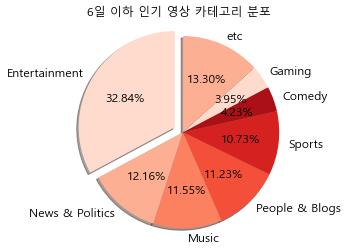

In [59]:
custom_palette = sns.color_palette("Reds")
sns.set_palette(custom_palette)
plt.pie(sizes,
        labels = labels,
        
        explode = explodes, # 각 조각 간의 간격 지정
        autopct = "%1.2f%%", # 우리가 부여한 숫자(sizes)를 알아서 퍼센트로 변환. 그 퍼센트의 소숫점 자릿수를 지정.
        shadow = True,
        startangle = 90, # 시작 각도
        textprops = {'fontsize':12},
       colors = custom_palette) # 글자 크기
plt.axis('equal') # x축과 y축의 길이를 동일하게 해줘
plt.title('6일 이하 인기 영상 카테고리 분포')
plt.show()

In [60]:
df_unique_short = df_unique_short = df_unique[df_unique['period'] <= 3]

In [61]:
df_unique_short['category_name'].value_counts(normalize=True) #3일로 줄여봄

Entertainment           0.28
News & Politics         0.24
Sports                  0.13
Music                   0.11
People & Blogs          0.07
Gaming                  0.05
Comedy                  0.03
Film & Animation        0.03
Education               0.02
Science & Technology    0.02
Pets & Animals          0.01
Travel & Events         0.01
Howto & Style           0.00
Autos & Vehicles        0.00
Nonprofits & Activism   0.00
Name: category_name, dtype: float64

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
short_count = df_unique_short['category_name'].value_counts(normalize=True) 
short_count#10일 이상 인기를 유지한 동영상들은 어떤 카테고리들이었나?

Entertainment           0.28
News & Politics         0.24
Sports                  0.13
Music                   0.11
People & Blogs          0.07
Gaming                  0.05
Comedy                  0.03
Film & Animation        0.03
Education               0.02
Science & Technology    0.02
Pets & Animals          0.01
Travel & Events         0.01
Howto & Style           0.00
Autos & Vehicles        0.00
Nonprofits & Activism   0.00
Name: category_name, dtype: float64

In [63]:
sizes = [short_count[0],short_count[1], short_count[2],short_count[3],short_count[4],short_count[5],short_count[6],short_count[7]+short_count[8]+short_count[9]+short_count[10]+short_count[11]+short_count[12]+short_count[13]+short_count[14]] # 각 조각의 크기
labels = ['Entertainment', 'News & Politics', 'Sports','Music','People & Blogs','Gaming','Comedy','etc'] # 각 조각의 이름
colors = ['yellowgreen', 'lightskyblue', 'lightcoral','lightseagreen','khaki','pink','magenta','lightcyan'] # 각 조각의 색깔
explodes = (0.1, 0, 0,0,0,0,0,0) # 첫 번째 조각에 대해서 0.1만큼의 간격 부여. 0은 간격 없음. default = 0.

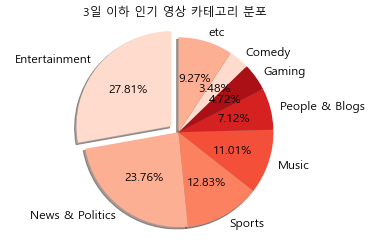

In [64]:
custom_palette = sns.color_palette("Reds")
sns.set_palette(custom_palette)
plt.pie(sizes,
        labels = labels,
       
        explode = explodes, # 각 조각 간의 간격 지정
        autopct = "%1.2f%%", # 우리가 부여한 숫자(sizes)를 알아서 퍼센트로 변환. 그 퍼센트의 소숫점 자릿수를 지정.
        shadow = True,
        startangle = 90, # 시작 각도
        textprops = {'fontsize':12},
       colors = custom_palette) # 글자 크기
plt.axis('equal') # x축과 y축의 길이를 동일하게 해줘
plt.title('3일 이하 인기 영상 카테고리 분포')
plt.show()

In [65]:
df_unique_short = df_unique_short = df_unique[df_unique['period'] <= 1]

In [66]:
df_unique_short['category_name'].value_counts(normalize=True)
#1일로 하니까 뉴스가 제일 많았다 
#insight no.2 역시 예상대로 뉴스는 휘발성이 강하므로 오랫동안 인기를 끌지 못 하는 성향이 있다? 
#사람들이 취미로 즐기는 여가생활에 대한 영상들은 기간이 짧아도 인기 영상으로 많이 선택되는 경향이 있는 것 같다!

Entertainment           0.26
News & Politics         0.26
Sports                  0.15
Music                   0.10
Gaming                  0.06
People & Blogs          0.05
Comedy                  0.03
Education               0.03
Film & Animation        0.01
Science & Technology    0.01
Howto & Style           0.01
Travel & Events         0.01
Autos & Vehicles        0.00
Nonprofits & Activism   0.00
Pets & Animals          0.00
Name: category_name, dtype: float64

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
short_count = df_unique_short['category_name'].value_counts(normalize=True) 
short_count#10일 이상 인기를 유지한 동영상들은 어떤 카테고리들이었나?

Entertainment           0.26
News & Politics         0.26
Sports                  0.15
Music                   0.10
Gaming                  0.06
People & Blogs          0.05
Comedy                  0.03
Education               0.03
Film & Animation        0.01
Science & Technology    0.01
Howto & Style           0.01
Travel & Events         0.01
Autos & Vehicles        0.00
Nonprofits & Activism   0.00
Pets & Animals          0.00
Name: category_name, dtype: float64

In [68]:
sizes = [short_count[0],short_count[1], short_count[2],short_count[3],short_count[4],short_count[5],short_count[6],short_count[7]+short_count[8]+short_count[9]+short_count[10]+short_count[11]+short_count[12]+short_count[13]+short_count[14]] # 각 조각의 크기
labels = ['News & Politics', 'Entertainment', 'Sports','Music','Gaming','People & Blogs','Comedy','etc'] # 각 조각의 이름
colors = ['yellowgreen', 'lightskyblue', 'lightcoral','lightseagreen','khaki','pink','magenta','lightcyan'] # 각 조각의 색깔
explodes = (0.1, 0, 0,0,0,0,0,0) # 첫 번째 조각에 대해서 0.1만큼의 간격 부여. 0은 간격 없음. default = 0.

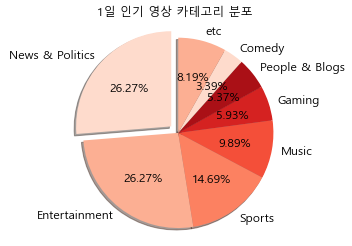

In [69]:
custom_palette = sns.color_palette("Reds")
sns.set_palette(custom_palette)
plt.pie(sizes,
        labels = labels,
        
        explode = explodes, # 각 조각 간의 간격 지정
        autopct = "%1.2f%%", # 우리가 부여한 숫자(sizes)를 알아서 퍼센트로 변환. 그 퍼센트의 소숫점 자릿수를 지정.
        shadow = True,
        startangle = 90, # 시작 각도
        textprops = {'fontsize':12},
       colors = custom_palette) # 글자 크기
plt.axis('equal') # x축과 y축의 길이를 동일하게 해줘
plt.title('1일 인기 영상 카테고리 분포')
plt.show()